In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("seaborn-v0_8")

In [61]:
df=pd.read_csv("data.csv")
df=pd.DataFrame(df)
use_cols = ["location", "date","total_cases", "new_cases","total_deaths", "new_deaths","population"]
df = df[use_cols]
df['date']=pd.to_datetime(df['date'])
df.fillna(0,inplace=True)

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772
...,...,...,...,...,...,...,...
429430,Zimbabwe,2024-07-31,266386.0,0.0,5740.0,0.0,16320539
429431,Zimbabwe,2024-08-01,266386.0,0.0,5740.0,0.0,16320539
429432,Zimbabwe,2024-08-02,266386.0,0.0,5740.0,0.0,16320539
429433,Zimbabwe,2024-08-03,266386.0,0.0,5740.0,0.0,16320539


In [62]:
df.isnull().sum()
df.dtypes


location                   str
date            datetime64[us]
total_cases            float64
new_cases              float64
total_deaths           float64
new_deaths             float64
population               int64
dtype: object

In [63]:
india=df[df['location']=="India"]
india = india[india["total_cases"] > 0]
india.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
173577,India,2020-02-02,2.0,2.0,0.0,0.0,1417173120
173578,India,2020-02-03,2.0,0.0,0.0,0.0,1417173120
173579,India,2020-02-04,2.0,0.0,0.0,0.0,1417173120
173580,India,2020-02-05,2.0,0.0,0.0,0.0,1417173120
173581,India,2020-02-06,2.0,0.0,0.0,0.0,1417173120


Text(0, 0.5, 'No. of Cases(in millions)')

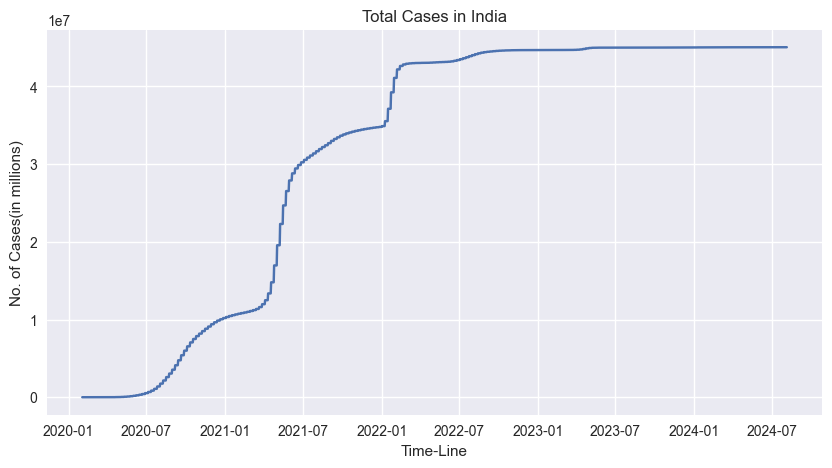

In [64]:

plt.figure(figsize=(10,5))
sns.lineplot(data=india,x='date',y='total_cases')
plt.title("Total Cases in India")
plt.xlabel("Time-Line")
plt.ylabel("No. of Cases(in millions)")

Text(0, 0.5, 'New Cases')

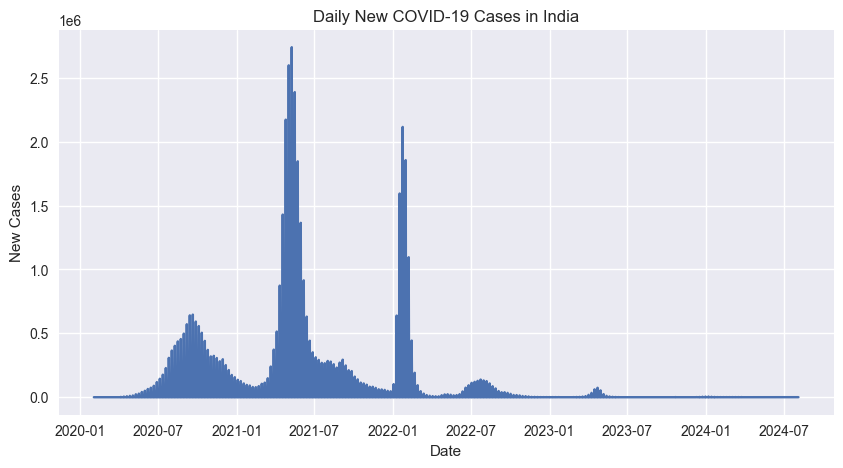

In [65]:
#Daily new cases grapg
plt.figure(figsize=(10,5))
sns.lineplot(data=india,x="date",y="new_cases")
plt.title("Daily New COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("New Cases")

Text(0, 0.5, 'Total Deaths')

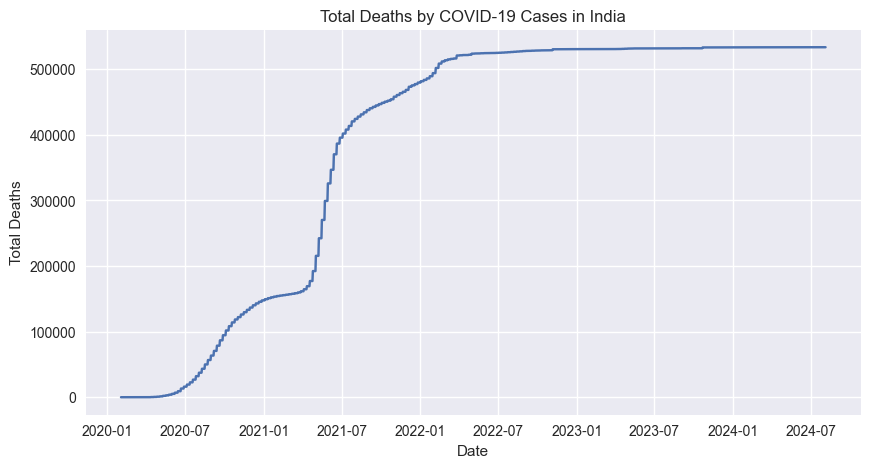

In [66]:
# Total no. of deaths in india
plt.figure(figsize=(10,5))
sns.lineplot(data=india,x="date",y="total_deaths")
plt.title("Total Deaths by COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Total Deaths")

Text(0, 0.5, 'Death Rate (%)')

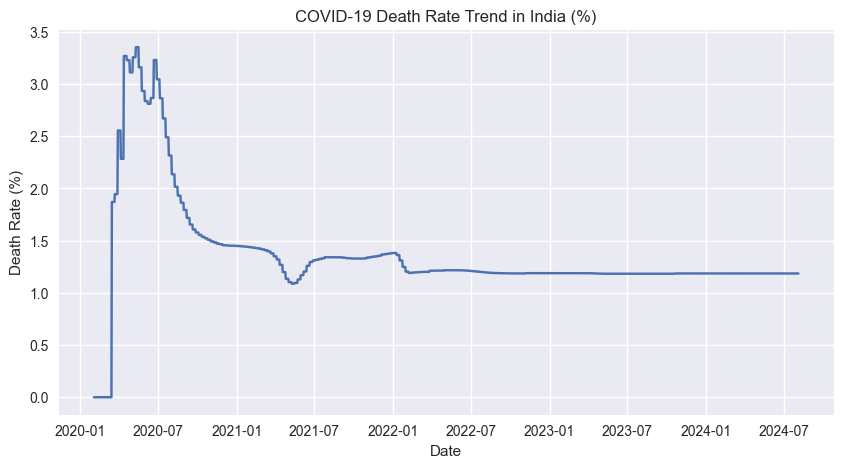

In [67]:
india["death_rate"] = (india["total_deaths"] / india["total_cases"]) * 100
plt.figure(figsize=(10,5))
sns.lineplot(
    data=india,
    x="date",
    y="death_rate"
)
plt.title("COVID-19 Death Rate Trend in India (%)")
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")




In [68]:
top5=df.groupby("location")['total_cases'].max().sort_values(ascending=False).head(5).index
top_df=df[df['location'].isin(top5)]

In [69]:
top_df


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
20092,Asia,2020-01-05,1.0,1.0,0.0,0.0,4721383370
20093,Asia,2020-01-06,1.0,0.0,0.0,0.0,4721383370
20094,Asia,2020-01-07,1.0,0.0,0.0,0.0,4721383370
20095,Asia,2020-01-08,1.0,0.0,0.0,0.0,4721383370
20096,Asia,2020-01-09,1.0,0.0,0.0,0.0,4721383370
...,...,...,...,...,...,...,...
424408,World,2024-08-10,0.0,0.0,0.0,0.0,7975105024
424409,World,2024-08-11,0.0,0.0,0.0,0.0,7975105024
424410,World,2024-08-12,0.0,0.0,0.0,0.0,7975105024
424411,World,2024-08-13,0.0,0.0,0.0,0.0,7975105024


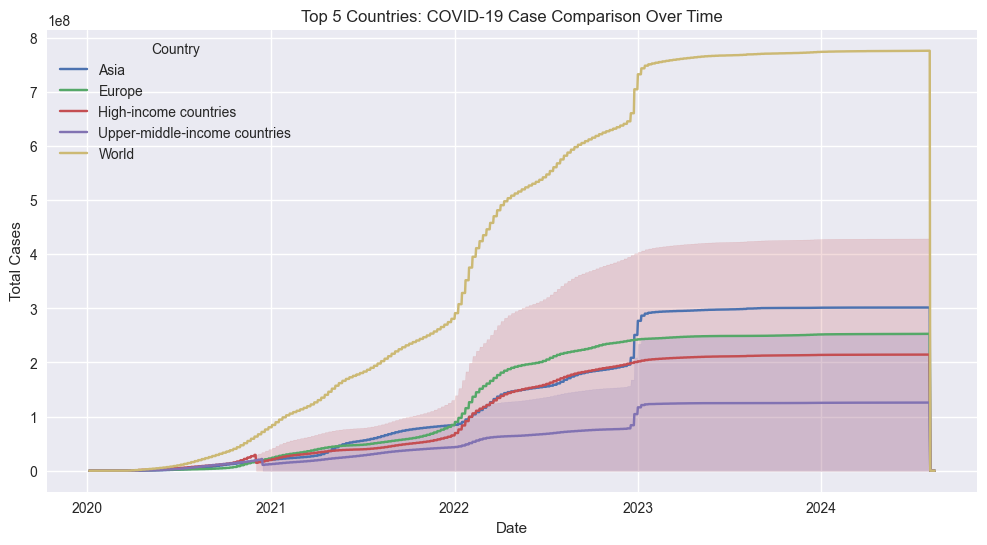

In [70]:
plt.figure(figsize=(12,6))
sns.lineplot(data=top_df,x="date",y="total_cases",hue="location")
plt.title("Top 5 Countries: COVID-19 Case Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")



Text(0, 0.5, 'Frequency')

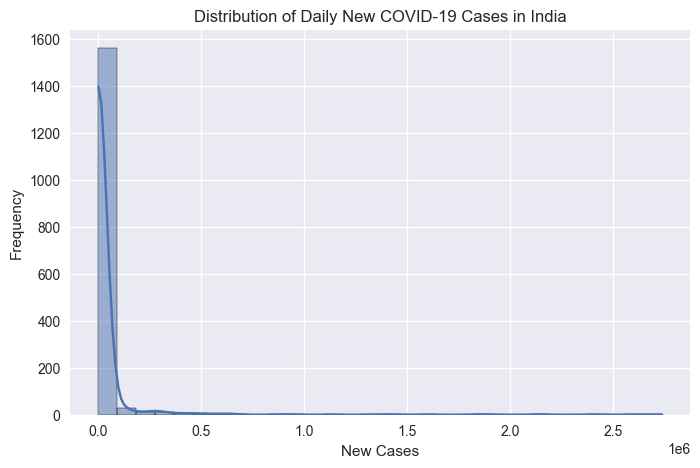

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(india['new_cases'],bins=30,kde=True)
plt.title("Distribution of Daily New COVID-19 Cases in India")
plt.xlabel("New Cases")
plt.ylabel("Frequency")